# Import

In [43]:
import numpy as np 
import pandas as pd 

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical, plot_model

In [46]:
# Dataset do MNIST já está no Keras
from keras.datasets import mnist

In [47]:
# Import do Dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [49]:
28*28

784

In [6]:
import random

# Identify unique values in y_train
unique_values = list(set(y_train))

# Create a dictionary to store the indexes for each unique value
indexes_to_keep = {value: [] for value in unique_values}

# Collect all indexes for each unique value in y_train
for i, value in enumerate(y_train):
    indexes_to_keep[value].append(i)

# Randomly select 2 indexes for each unique value
selected_indexes = []
for indexes in indexes_to_keep.values():
    selected_indexes.extend(random.sample(indexes, 600))

# Sort the selected indexes to maintain the original order
selected_indexes.sort()

# Create y_train from the selected indexes
y_train = y_train[selected_indexes]
x_train = x_train[selected_indexes,:,:]

In [7]:
len(x_train)

6000

In [8]:
# Contar quantos de cada número resposta temos na base de treino
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600}


In [9]:
# Contar quantos de cada número resposta temos na base de teste
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [10]:
# Só para visualizar aleatóriamente 25 dos dados que possuimos
indexes = np.random.randint(0, x_train.shape[0], size=25)
# indexes = np.random.randint(0, len(y_train), size=25)
images = x_train[indexes]
labels = y_train[indexes]

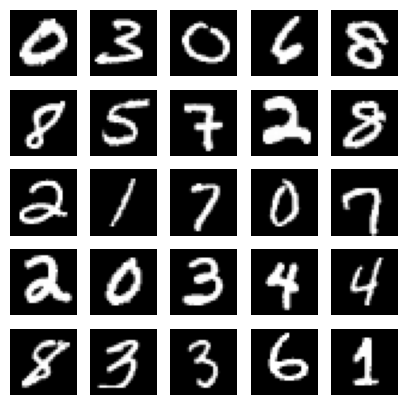

In [11]:
# Plotar 25 digitos do mnist
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [12]:
# Quantos valores únicos temos como resposta
num_labels = len(np.unique(y_train))
num_labels

10

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

The batch_size argument indicates the number of data that we will use for each update of the model parameters. </br>
Hidden_units shows the number of hidden units. </br>
Dropout is the dropout rate (more on this in section 7 - Overfitting and Regularization).

Softmax converts a vector of values to a probability distribution. </br>
The elements of the output vector are in range (0, 1) and sum to 1. </br>
Each vector is handled independently. The axis argument sets which axis of the input the function is applied along. </br>
Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution. </br>
The softmax of each vector x is computed as exp(x) / tf.reduce_sum(exp(x)). </br>
The input values in are the log-odds of the resulting probability.

Applies Dropout to the input. </br>
 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged. </br>

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

Categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Otimizador: É o gradiente descendente.

# Covolucional

In [13]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test = x_test.astype('float32') / 255

Canal de cores, o número "1".

In [14]:
x_train.shape

(6000, 28, 28, 1)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [21]:
# Parametros da nossa rede
batch_size = 10
hidden_units = 128
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

%%time
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

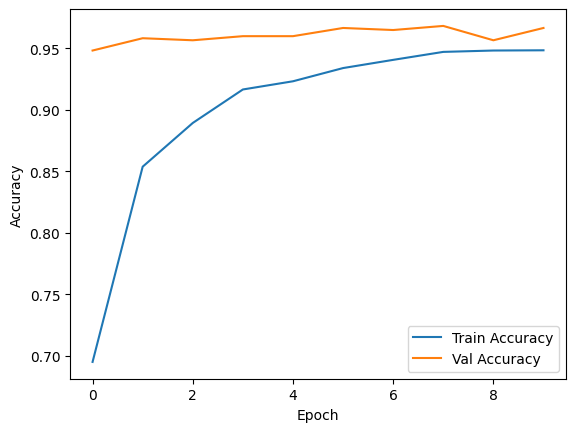

In [25]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

In [26]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1000/1000 [==============================] - 2s 2ms/step - loss: 0.1041 - accuracy: 0.9696

Test accuracy: 97.0%


## Aumentar o Batch Size

Epoch 1/10
27/27 [==============================] - 2s 45ms/step - loss: 1.5298 - accuracy: 0.4865 - val_loss: 0.4775 - val_accuracy: 0.8783
Epoch 2/10
27/27 [==============================] - 1s 44ms/step - loss: 0.7346 - accuracy: 0.7626 - val_loss: 0.3305 - val_accuracy: 0.9150
Epoch 3/10
27/27 [==============================] - 1s 42ms/step - loss: 0.6011 - accuracy: 0.8104 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 4/10
27/27 [==============================] - 1s 46ms/step - loss: 0.5460 - accuracy: 0.8343 - val_loss: 0.2527 - val_accuracy: 0.9317
Epoch 5/10
27/27 [==============================] - 1s 48ms/step - loss: 0.4792 - accuracy: 0.8506 - val_loss: 0.2331 - val_accuracy: 0.9317
Epoch 6/10
27/27 [==============================] - 1s 49ms/step - loss: 0.4299 - accuracy: 0.8659 - val_loss: 0.2144 - val_accuracy: 0.9300
Epoch 7/10
27/27 [==============================] - 1s 47ms/step - loss: 0.4006 - accuracy: 0.8741 - val_loss: 0.1955 - val_accuracy: 0.9467
Epoch 8/10
27

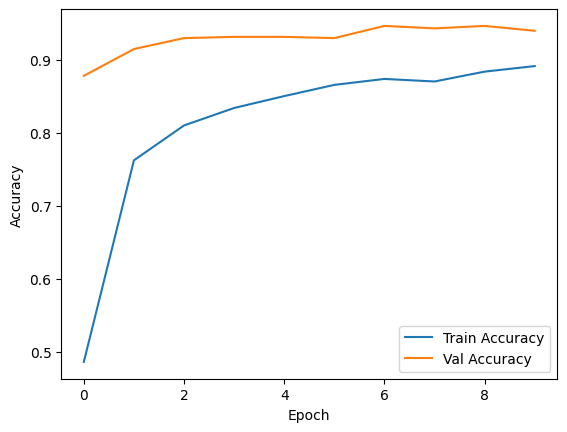

50/50 [==============================] - 1s 10ms/step - loss: 0.2084 - accuracy: 0.9354

Test accuracy: 93.5%


In [28]:
# Parametros da nossa rede
batch_size = 200
hidden_units = 128
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
54/54 [==============================] - 2s 25ms/step - loss: 1.2016 - accuracy: 0.5974 - val_loss: 0.3543 - val_accuracy: 0.8983
Epoch 2/10
54/54 [==============================] - 1s 23ms/step - loss: 0.6068 - accuracy: 0.8074 - val_loss: 0.2781 - val_accuracy: 0.9167
Epoch 3/10
54/54 [==============================] - 1s 23ms/step - loss: 0.4995 - accuracy: 0.8437 - val_loss: 0.2448 - val_accuracy: 0.9267
Epoch 4/10
54/54 [==============================] - 1s 23ms/step - loss: 0.4369 - accuracy: 0.8624 - val_loss: 0.2273 - val_accuracy: 0.9317
Epoch 5/10
54/54 [==============================] - 1s 24ms/step - loss: 0.3972 - accuracy: 0.8750 - val_loss: 0.1980 - val_accuracy: 0.9500
Epoch 6/10
54/54 [==============================] - 1s 24ms/step - loss: 0.3645 - accuracy: 0.8826 - val_loss: 0.1838 - val_accuracy: 0.9517
Epoch 7/10
54/54 [==============================] - 1s 25ms/step - loss: 0.3362 - accuracy: 0.8956 - val_loss: 0.1815 - val_accuracy: 0.9500
Epoch 8/10
54

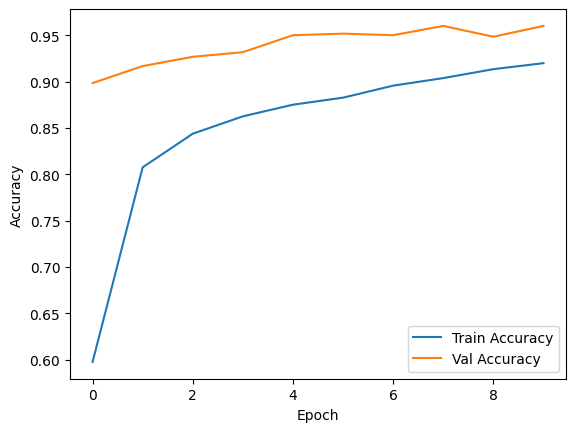

100/100 [==============================] - 1s 6ms/step - loss: 0.1567 - accuracy: 0.9509

Test accuracy: 95.1%


In [40]:
# Parametros da nossa rede
batch_size = 100
hidden_units = 128
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
216/216 [==============================] - 2s 9ms/step - loss: 0.9095 - accuracy: 0.7046 - val_loss: 0.2854 - val_accuracy: 0.9217
Epoch 2/10
216/216 [==============================] - 2s 9ms/step - loss: 0.4529 - accuracy: 0.8565 - val_loss: 0.1849 - val_accuracy: 0.9567
Epoch 3/10
216/216 [==============================] - 2s 9ms/step - loss: 0.3387 - accuracy: 0.8961 - val_loss: 0.1460 - val_accuracy: 0.9600
Epoch 4/10
216/216 [==============================] - 2s 8ms/step - loss: 0.2579 - accuracy: 0.9180 - val_loss: 0.1227 - val_accuracy: 0.9650
Epoch 5/10
216/216 [==============================] - 2s 8ms/step - loss: 0.2195 - accuracy: 0.9298 - val_loss: 0.1056 - val_accuracy: 0.9700
Epoch 6/10
216/216 [==============================] - 2s 9ms/step - loss: 0.1945 - accuracy: 0.9396 - val_loss: 0.1151 - val_accuracy: 0.9650
Epoch 7/10
216/216 [==============================] - 2s 9ms/step - loss: 0.1723 - accuracy: 0.9465 - val_loss: 0.1014 - val_accuracy: 0.9650
Epoch 

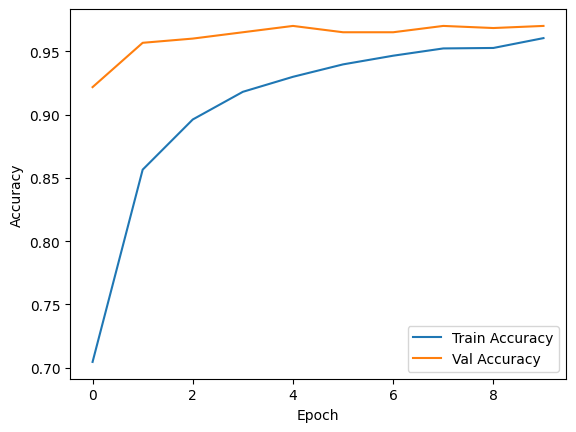

400/400 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9717

Test accuracy: 97.2%


In [30]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

## Alterar o Hidden Units

Epoch 1/10
216/216 [==============================] - 2s 9ms/step - loss: 0.9568 - accuracy: 0.6826 - val_loss: 0.3212 - val_accuracy: 0.9100
Epoch 2/10
216/216 [==============================] - 2s 9ms/step - loss: 0.5253 - accuracy: 0.8263 - val_loss: 0.2209 - val_accuracy: 0.9433
Epoch 3/10
216/216 [==============================] - 2s 10ms/step - loss: 0.3798 - accuracy: 0.8820 - val_loss: 0.1746 - val_accuracy: 0.9450
Epoch 4/10
216/216 [==============================] - 2s 9ms/step - loss: 0.3183 - accuracy: 0.8996 - val_loss: 0.1511 - val_accuracy: 0.9567
Epoch 5/10
216/216 [==============================] - 2s 10ms/step - loss: 0.2701 - accuracy: 0.9154 - val_loss: 0.1403 - val_accuracy: 0.9633
Epoch 6/10
216/216 [==============================] - 2s 9ms/step - loss: 0.2244 - accuracy: 0.9341 - val_loss: 0.1170 - val_accuracy: 0.9633
Epoch 7/10
216/216 [==============================] - 2s 9ms/step - loss: 0.2065 - accuracy: 0.9350 - val_loss: 0.1003 - val_accuracy: 0.9633
Epoc

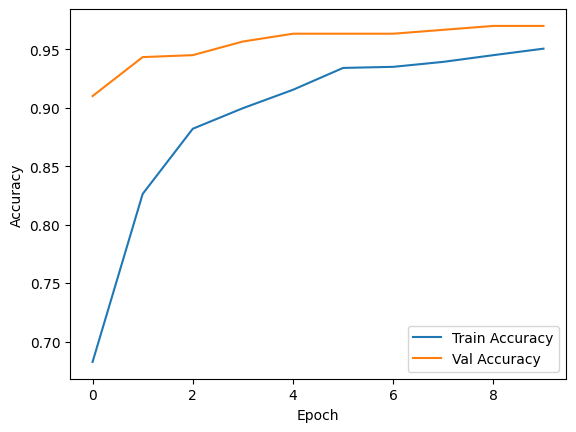

400/400 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9701

Test accuracy: 97.0%


In [41]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
216/216 [==============================] - 2s 10ms/step - loss: 1.0344 - accuracy: 0.6513 - val_loss: 0.3004 - val_accuracy: 0.9133
Epoch 2/10
216/216 [==============================] - 2s 11ms/step - loss: 0.5851 - accuracy: 0.8070 - val_loss: 0.2634 - val_accuracy: 0.9300
Epoch 3/10
216/216 [==============================] - 2s 11ms/step - loss: 0.4397 - accuracy: 0.8596 - val_loss: 0.1821 - val_accuracy: 0.9517
Epoch 4/10
216/216 [==============================] - 2s 10ms/step - loss: 0.3456 - accuracy: 0.8928 - val_loss: 0.1496 - val_accuracy: 0.9533
Epoch 5/10
216/216 [==============================] - 2s 9ms/step - loss: 0.2992 - accuracy: 0.9050 - val_loss: 0.1403 - val_accuracy: 0.9583
Epoch 6/10
216/216 [==============================] - 2s 10ms/step - loss: 0.2424 - accuracy: 0.9248 - val_loss: 0.1358 - val_accuracy: 0.9633
Epoch 7/10
216/216 [==============================] - 2s 8ms/step - loss: 0.2154 - accuracy: 0.9313 - val_loss: 0.1137 - val_accuracy: 0.9633
E

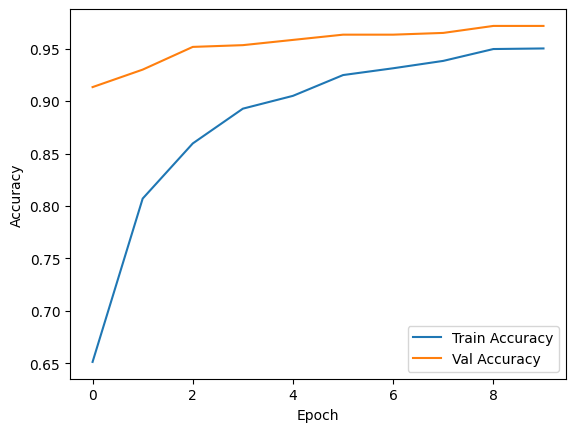

400/400 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9696

Test accuracy: 97.0%


In [42]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 32
dropout = 0.45

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

## Alterar o DropOut

Epoch 1/10
216/216 [==============================] - 3s 10ms/step - loss: 0.5401 - accuracy: 0.8306 - val_loss: 0.2105 - val_accuracy: 0.9500
Epoch 2/10
216/216 [==============================] - 2s 10ms/step - loss: 0.1888 - accuracy: 0.9430 - val_loss: 0.1521 - val_accuracy: 0.9600
Epoch 3/10
216/216 [==============================] - 2s 9ms/step - loss: 0.1284 - accuracy: 0.9585 - val_loss: 0.1080 - val_accuracy: 0.9683
Epoch 4/10
216/216 [==============================] - 2s 8ms/step - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.1135 - val_accuracy: 0.9700
Epoch 5/10
216/216 [==============================] - 2s 8ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.1132 - val_accuracy: 0.9683
Epoch 6/10
216/216 [==============================] - 2s 9ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.1009 - val_accuracy: 0.9717
Epoch 7/10
216/216 [==============================] - 2s 8ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.1123 - val_accuracy: 0.9700
Epoc

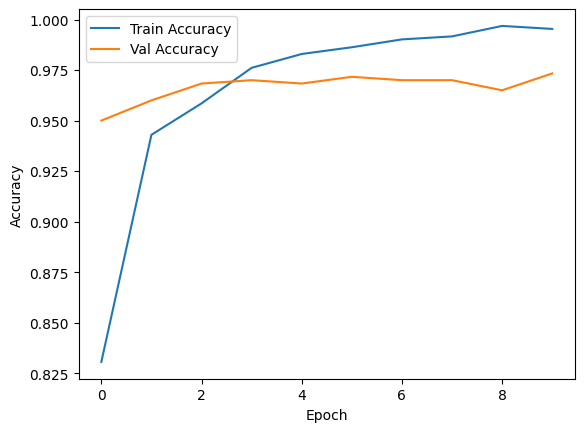

400/400 [==============================] - 1s 3ms/step - loss: 0.1063 - accuracy: 0.9698

Test accuracy: 97.0%


In [32]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.1

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
216/216 [==============================] - 2s 9ms/step - loss: 1.6665 - accuracy: 0.4120 - val_loss: 0.6603 - val_accuracy: 0.8767
Epoch 2/10
216/216 [==============================] - 2s 8ms/step - loss: 1.0501 - accuracy: 0.6330 - val_loss: 0.3712 - val_accuracy: 0.9400
Epoch 3/10
216/216 [==============================] - 2s 8ms/step - loss: 0.8228 - accuracy: 0.7189 - val_loss: 0.2681 - val_accuracy: 0.9433
Epoch 4/10
216/216 [==============================] - 2s 8ms/step - loss: 0.6978 - accuracy: 0.7720 - val_loss: 0.2271 - val_accuracy: 0.9450
Epoch 5/10
216/216 [==============================] - 2s 8ms/step - loss: 0.6112 - accuracy: 0.7980 - val_loss: 0.1878 - val_accuracy: 0.9517
Epoch 6/10
216/216 [==============================] - 2s 8ms/step - loss: 0.5542 - accuracy: 0.8202 - val_loss: 0.1705 - val_accuracy: 0.9533
Epoch 7/10
216/216 [==============================] - 2s 9ms/step - loss: 0.5090 - accuracy: 0.8276 - val_loss: 0.1499 - val_accuracy: 0.9583
Epoch 

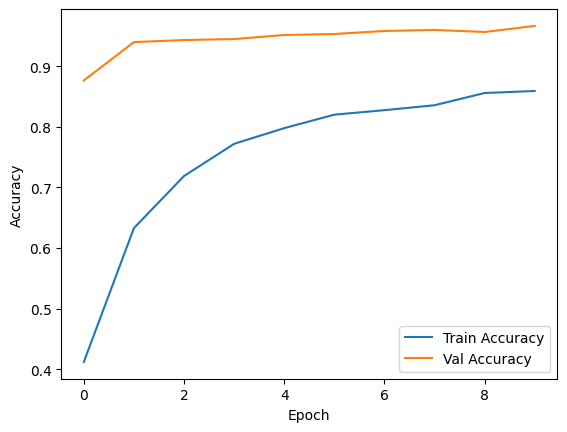

400/400 [==============================] - 1s 3ms/step - loss: 0.1362 - accuracy: 0.9616

Test accuracy: 96.2%


In [33]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.7

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

## Adicionar mais filtros:

Epoch 1/10
216/216 [==============================] - 4s 17ms/step - loss: 0.9838 - accuracy: 0.6633 - val_loss: 0.2916 - val_accuracy: 0.8967
Epoch 2/10
216/216 [==============================] - 3s 16ms/step - loss: 0.5645 - accuracy: 0.8115 - val_loss: 0.2120 - val_accuracy: 0.9367
Epoch 3/10
216/216 [==============================] - 3s 15ms/step - loss: 0.3807 - accuracy: 0.8789 - val_loss: 0.1392 - val_accuracy: 0.9633
Epoch 4/10
216/216 [==============================] - 3s 15ms/step - loss: 0.3053 - accuracy: 0.9041 - val_loss: 0.1433 - val_accuracy: 0.9583
Epoch 5/10
216/216 [==============================] - 3s 15ms/step - loss: 0.2363 - accuracy: 0.9269 - val_loss: 0.1184 - val_accuracy: 0.9617
Epoch 6/10
216/216 [==============================] - 3s 16ms/step - loss: 0.2050 - accuracy: 0.9313 - val_loss: 0.1161 - val_accuracy: 0.9650
Epoch 7/10
216/216 [==============================] - 3s 15ms/step - loss: 0.1686 - accuracy: 0.9459 - val_loss: 0.1114 - val_accuracy: 0.9667

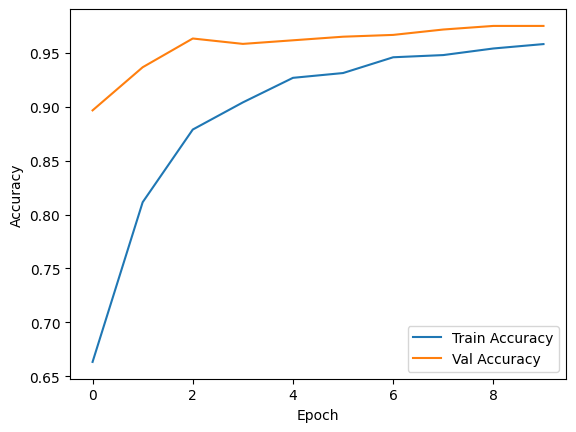

400/400 [==============================] - 2s 4ms/step - loss: 0.1043 - accuracy: 0.9703

Test accuracy: 97.0%


In [35]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

## Adicionar mais uma camada de Conv2D:

Epoch 1/10
216/216 [==============================] - 4s 15ms/step - loss: 1.1264 - accuracy: 0.6098 - val_loss: 0.2507 - val_accuracy: 0.9300
Epoch 2/10
216/216 [==============================] - 3s 14ms/step - loss: 0.5404 - accuracy: 0.8270 - val_loss: 0.1632 - val_accuracy: 0.9500
Epoch 3/10
216/216 [==============================] - 3s 14ms/step - loss: 0.3642 - accuracy: 0.8837 - val_loss: 0.1150 - val_accuracy: 0.9667
Epoch 4/10
216/216 [==============================] - 3s 14ms/step - loss: 0.3147 - accuracy: 0.9006 - val_loss: 0.1040 - val_accuracy: 0.9633
Epoch 5/10
216/216 [==============================] - 3s 14ms/step - loss: 0.2627 - accuracy: 0.9157 - val_loss: 0.0763 - val_accuracy: 0.9700
Epoch 6/10
216/216 [==============================] - 3s 14ms/step - loss: 0.2350 - accuracy: 0.9244 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 7/10
216/216 [==============================] - 3s 14ms/step - loss: 0.2067 - accuracy: 0.9350 - val_loss: 0.0799 - val_accuracy: 0.9700

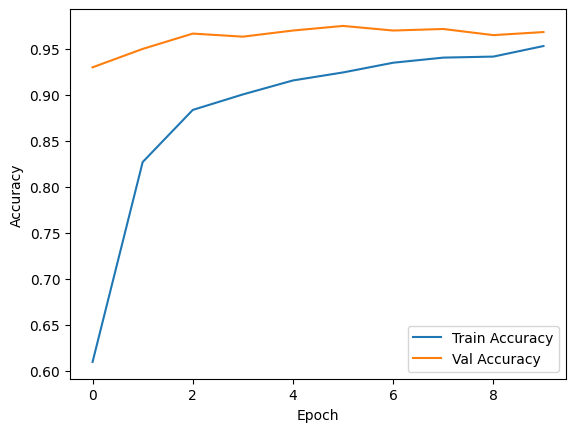

400/400 [==============================] - 2s 4ms/step - loss: 0.0656 - accuracy: 0.9783

Test accuracy: 97.8%


In [39]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
216/216 [==============================] - 4s 15ms/step - loss: 0.6183 - accuracy: 0.8002 - val_loss: 0.1711 - val_accuracy: 0.9467
Epoch 2/10
216/216 [==============================] - 3s 14ms/step - loss: 0.1924 - accuracy: 0.9417 - val_loss: 0.1301 - val_accuracy: 0.9567
Epoch 3/10
216/216 [==============================] - 3s 14ms/step - loss: 0.1362 - accuracy: 0.9593 - val_loss: 0.0954 - val_accuracy: 0.9667
Epoch 4/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0940 - accuracy: 0.9696 - val_loss: 0.1034 - val_accuracy: 0.9600
Epoch 5/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0782 - accuracy: 0.9719 - val_loss: 0.1077 - val_accuracy: 0.9717
Epoch 6/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0578 - accuracy: 0.9794 - val_loss: 0.0984 - val_accuracy: 0.9683
Epoch 7/10
216/216 [==============================] - 3s 15ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0846 - val_accuracy: 0.9733

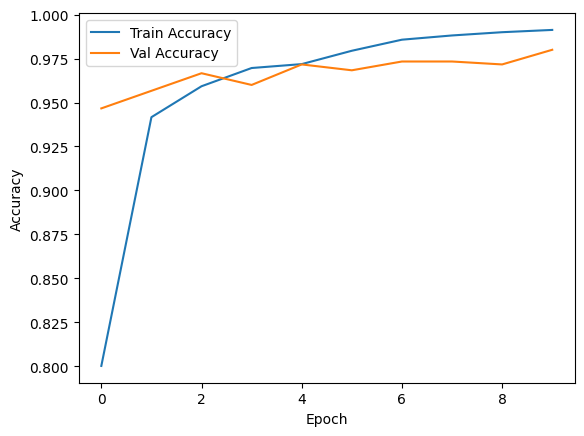

400/400 [==============================] - 2s 4ms/step - loss: 0.0769 - accuracy: 0.9765

Test accuracy: 97.6%


In [38]:
# Parametros da nossa rede
batch_size = 25
hidden_units = 256
dropout = 0.1

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split = 0.1)

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Redes recorrentes para séries temporais

Desafio, previsão do MNIST como série temporal

LSTM

Mais pra frente Tokenização